# Chapter: 4
## Section: Probability-based performance metrics

In [1]:
import numpy as np
import pandas as pd
import random
import sklearn
from sklearn import metrics

np.random.seed(123)

# confusion matrix
from sklearn.metrics import confusion_matrix as cm
# accuracy
from sklearn.metrics import accuracy_score
# balanced accuracy
from sklearn.metrics import balanced_accuracy_score
# f1_score
from sklearn.metrics import f1_score
# Precision
from sklearn.metrics import precision_score
# Recall or Sensitivity
from sklearn.metrics import recall_score
# roc_acu
from sklearn.metrics import roc_auc_score
# pr_auc
from sklearn.metrics import average_precision_score

def evaluate_pred(labels, predicted_labels):
  '''


  '''
  acc = accuracy_score(y_true = labels, y_pred = predicted_labels)

  bal_acc = balanced_accuracy_score(y_true = labels, y_pred = predicted_labels)

  f1 = f1_score(y_true = labels, y_pred = predicted_labels)

  # mcc = matthews_corrcoef(y_true = labels, y_pred = predicted_labels)

  precision = precision_score(y_true = labels, y_pred = predicted_labels)

  recall = recall_score(y_true = labels, y_pred = predicted_labels)

  cm_values = cm(y_true = labels, y_pred = predicted_labels)
  tn, fp, fn, tp = cm_values.ravel()

  specificity = tn/(tn+fp)

  eval_dic = {'acc': acc,
              'bal acc': bal_acc,
              'f1': f1,
              'precision': precision,
              'recall': recall,
              'specificity': specificity}

  return eval_dic

def evaluate_prob(labels, probabilities_positiveclass):

  roc_auc = roc_auc_score(y_true = labels, y_score = probabilities_positiveclass)
  pr_auc = average_precision_score(y_true = labels, y_score = probabilities_positiveclass)

  eval_dic = {'roc auc': roc_auc,
              'pr auc': pr_auc}

  return eval_dic


def eval_samples(labels, pred_list, prob_list):

  if len(pred_list) != len(prob_list) or len(pred_list[0]) != len(prob_list[0]):
    print('list of predicted labels and probabilities dont match ')
    raise

  for iter in range(0, len(pred_list)):
    pred_labels = pred_list[iter]
    pred_probs = prob_list[iter]

    evaluation_predictedlabels = evaluate_pred(labels = labels, predicted_labels = pred_labels)
    evaluation_predictedprobs = evaluate_prob(labels = labels, probabilities_positiveclass = pred_probs)

    evals = {**evaluation_predictedlabels, **evaluation_predictedprobs}
    if iter == 0:
      eval_df = pd.DataFrame(columns=list(evals.keys()))
    else:
      eval_df = eval_df.append(pd.Series(evals), ignore_index=True)

  return eval_df

In [2]:
def random_gen(pos_frac_pred, num = 100, class_num = 2):
  scores = [np.random.random()/2 for iter in range(0, int((1-pos_frac_pred)*num))]
  scores = scores + [0.5+np.random.random()/2 for iter in range(0, num-len(scores))]
  random.shuffle(scores)
  labels = [0 if score < 0.5 else 1 for score in scores]

  return scores, labels

def random_sample(pos_frac_pred, sampling_num = 100, datapoint_num = 100, class_num = 2):


  random_probs = []
  random_labels = []
  for iter in range(0, sampling_num):
    probs, labels = random_gen(num = datapoint_num, class_num = class_num, pos_frac_pred = pos_frac_pred)

    random_probs.append(probs)
    random_labels.append(labels)

  return random_probs, random_labels

You need to change `pos_frac_pred` and `positive_frac_true` in the following cell to generate different boxplots provided in Figure 4.4 of the book.

In [3]:
pos_frac_pred = 0.8
positive_frac_true = 0.2
sample_num = 1000

positive_num = int(positive_frac_true*sample_num)
labels = [1]*positive_num+[0]*(sample_num-positive_num) #[random.randint(0,1) for iter in range(0, 1000)]
random_probs, random_labels = random_sample(sampling_num = 1000, datapoint_num = len(labels), class_num = 2, pos_frac_pred = pos_frac_pred)

In [ ]:
eval_df = eval_samples(labels = labels, pred_list = random_labels, prob_list = random_probs)

<ipython-input-5-c824d1b4f86c>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels = [0, 0.2, 0.4, 0.6, 0.8, 1],fontsize = 16)


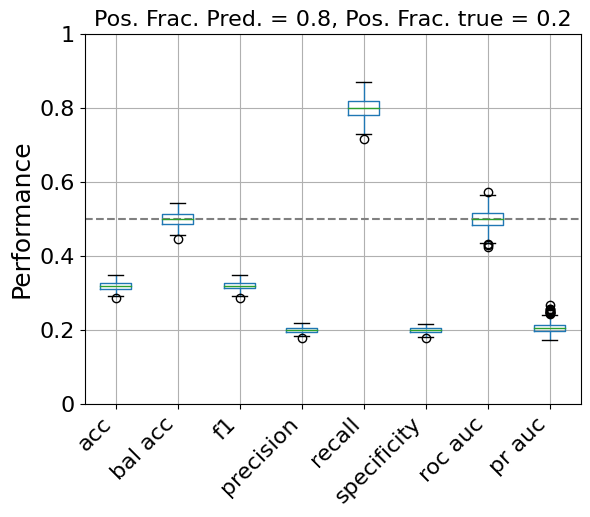

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
boxplot = eval_df.boxplot(fontsize = 18, ax=ax)
ax.set_ylim([0,1])
ax.set_xticklabels(eval_df.columns.values, rotation=45, ha='right', fontsize = 16)
ax.set_yticklabels(labels = [0, 0.2, 0.4, 0.6, 0.8, 1],fontsize = 16)
ax.margins(y=0.05)
ax.set_ylabel('Performance', fontsize = 18)
plt.title('Pos. Frac. Pred. = '+str(pos_frac_pred)+', Pos. Frac. true = '+str(positive_frac_true), fontsize = 16)
plt.hlines(0.5, xmin=0.5, xmax=8.5, color='grey', linestyles='--')

plt.show()